In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("IRIS.csv")

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.shape

(150, 5)

In [43]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
#Check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

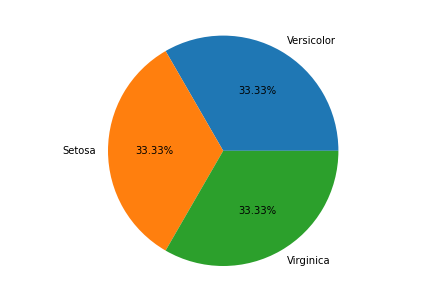

In [46]:
fig =plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

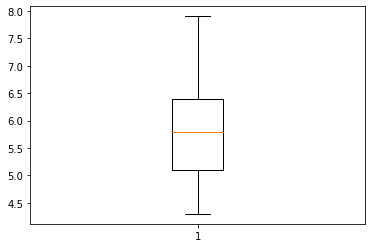

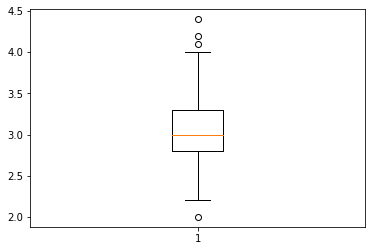

In [47]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']])
plt.show()

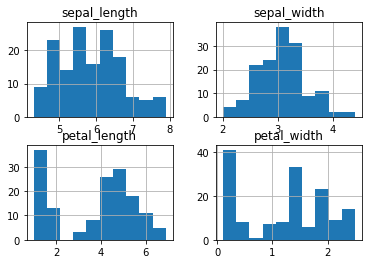

In [48]:
df.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

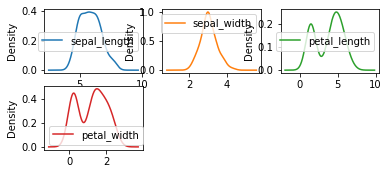

In [49]:
df.plot(kind= 'density',subplots= True,layout=(3,3),sharex= False)

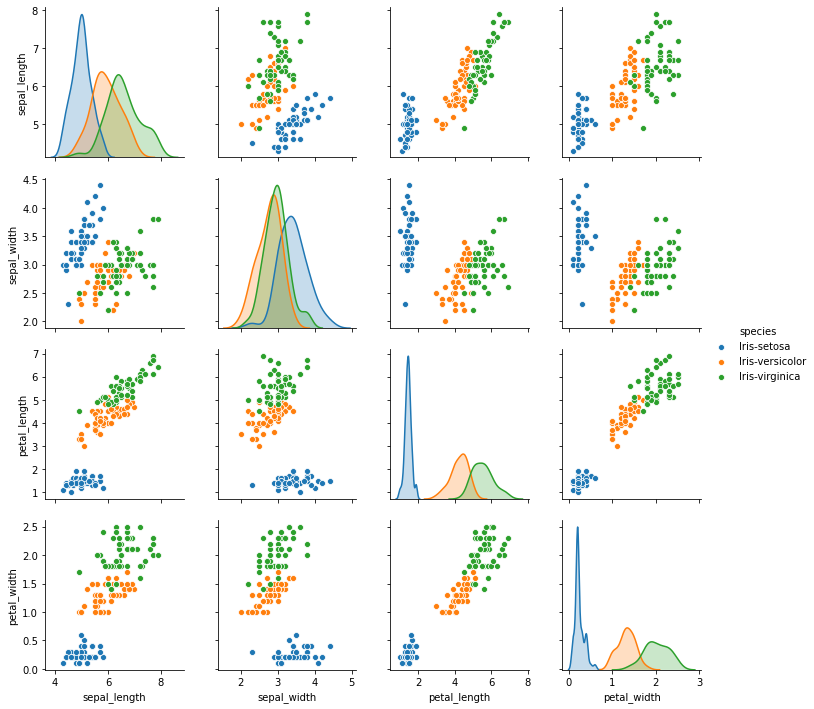

In [50]:
import seaborn as sns
sns.pairplot(data=df, hue='species')

<AxesSubplot:>

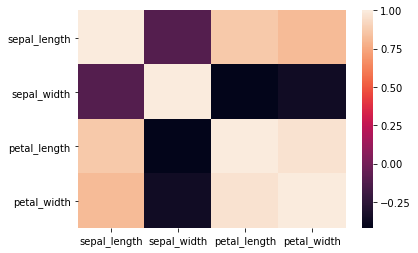

In [51]:
sns.heatmap(df.corr())

In [52]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size= 0.25)

In [53]:
print(train.shape)

(112, 5)


In [54]:
print(test.shape)

(38, 5)


In [55]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
test_y = test.species

In [56]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
138,6.0,3.0,4.8,1.8
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
104,6.5,3.0,5.8,2.2
54,6.5,2.8,4.6,1.5


In [57]:
test_y.head()

111     Iris-virginica
135     Iris-virginica
130     Iris-virginica
125     Iris-virginica
87     Iris-versicolor
Name: species, dtype: object

In [58]:
test_y.head()

111     Iris-virginica
135     Iris-virginica
130     Iris-virginica
125     Iris-virginica
87     Iris-versicolor
Name: species, dtype: object

In [59]:
#using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(test_y,y_pred))

Accuracy Score 0.9473684210526315


In [60]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,y_pred)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,y_pred))

Confusion matrix: 
 [[13  0  0]
 [ 0  6  1]
 [ 0  1 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      0.86      0.86         7
 Iris-virginica       0.94      0.94      0.94        18

      micro avg       0.95      0.95      0.95        38
      macro avg       0.93      0.93      0.93        38
   weighted avg       0.95      0.95      0.95        38



## Input vector

In [74]:
X_new = np.array([[5,3,4,6],[7,3,1.3,0.3]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


In [75]:

y_pred = model.predict(X_new)

In [76]:
# Test result Prediction
print("Prediction of Species: {}".format(y_pred))

Prediction of Species: ['Iris-versicolor' 'Iris-setosa']


## Thank You!